# Poisionous Mushroom Classification


With `Classification` we want to find the hyperplane that __best separates__ data into similar categories.

* It is a classification problem
* Features include numerical values and categorical values

# kNN Classifier (k-nearest Neighbours)

## Dataset Source
Secondary Mushroom Dataset
Simulated mushrooms for binary classification into edible and poisonous

## About Dataset
The given information is about the Secondary Mushroom Dataset, the Primary Mushroom Dataset used for the simulation and the respective metadata can be found in the zip.

This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms
per species). Each mushroom is identified as definitely edible, definitely poisonous, or of
unknown edibility and not recommended (the latter class was combined with the poisonous class).

### Get acquainted with your data

This is the original [Secondary Mushroom Dataset](https://www.kaggle.com/datasets/joebeachcapital/secondary-mushroom-dataset).

* Class information:
	1. class		poisonous=p, edibile=e (binary)

* Variable Information:
   (n: nominal, m: metrical; nominal values as sets of values)
   1. cap-diameter (m):			float number in cm
   2. cap-shape (n):            bell=b, conical=c, convex=x, flat=f,
                                sunken=s, spherical=p, others=o
   3. cap-surface (n):          fibrous=i, grooves=g, scaly=y, smooth=s,
								shiny=h, leathery=l, silky=k, sticky=t,
								wrinkled=w, fleshy=e
   4. cap-color (n):            brown=n, buff=b, gray=g, green=r, pink=p,
								purple=u, red=e, white=w, yellow=y, blue=l, 
								orange=o,  black=k
   5. does-bruise-bleed (n):	bruises-or-bleeding=t,no=f
   6. gill-attachment (n):      adnate=a, adnexed=x, decurrent=d, free=e, 
								sinuate=s, pores=p, none=f, unknown=?
   7. gill-spacing (n):         close=c, distant=d, none=f
   8. gill-color (n):           see cap-color + none=f
   9. stem-height (m):			float number in cm
   10. stem-width (m):			float number in mm   
   11. stem-root (n):           bulbous=b, swollen=s, club=c, cup=u, equal=e,
                                rhizomorphs=z, rooted=r
   12. stem-surface (n): 		see cap-surface + none=f
   13. stem-color (n):			see cap-color + none=f
   14. veil-type (n):           partial=p, universal=u
   15. veil-color (n):          see cap-color + none=f
   16. has-ring (n):            ring=t, none=f
   17. ring-type (n):           cobwebby=c, evanescent=e, flaring=r, grooved=g, 
							    large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
   18. spore-print-color (n):   see cap color
   19. habitat (n):             grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
                                urban=u, waste=w, woods=d
   20. season (n):				spring=s, summer=u, autumn=a, winter=w

## Import Library

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


/var/folders/17/vv58yhq96kn_y63534y3j7k00000gn/T/ipykernel_9033/1479895222.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## I. Data Preparation
In this section, we load the data, inspect missing values, convert data type, convert target to numerical

In [2]:
# set display columns
pd.set_option('display.max_columns', 30)

# create a dataframe for statistic evaluation
df = pd.read_csv('data/secondary_data.csv', sep=';')
df.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,18.79,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,16.89,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,17.44,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,18.69,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,16.88,s,y,w,u,w,t,p,NaN,d,w


## Exploratory Data Analysis
Columns explanation:
   (n: nominal, m: metrical; nominal values as sets of values)
   1. cap-diameter (m):			float number in cm
   2. cap-shape (n):            bell=b, conical=c, convex=x, flat=f,
                                sunken=s, spherical=p, others=o
   3. cap-surface (n):          fibrous=i, grooves=g, scaly=y, smooth=s,
								shiny=h, leathery=l, silky=k, sticky=t,
								wrinkled=w, fleshy=e
   4. cap-color (n):            brown=n, buff=b, gray=g, green=r, pink=p,
								purple=u, red=e, white=w, yellow=y, blue=l, 
								orange=o,  black=k
   5. does-bruise-bleed (n):	bruises-or-bleeding=t,no=f
   6. gill-attachment (n):      adnate=a, adnexed=x, decurrent=d, free=e, 
								sinuate=s, pores=p, none=f, unknown=?
   7. gill-spacing (n):         close=c, distant=d, none=f
   8. gill-color (n):           see cap-color + none=f
   9. stem-height (m):			float number in cm
   10. stem-width (m):			float number in mm   
   11. stem-root (n):           bulbous=b, swollen=s, club=c, cup=u, equal=e,
                                rhizomorphs=z, rooted=r
   12. stem-surface (n): 		see cap-surface + none=f
   13. stem-color (n):			see cap-color + none=f
   14. veil-type (n):           partial=p, universal=u
   15. veil-color (n):          see cap-color + none=f
   16. has-ring (n):            ring=t, none=f
   17. ring-type (n):           cobwebby=c, evanescent=e, flaring=r, grooved=g, 
							    large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
   18. spore-print-color (n):   see cap color
   19. habitat (n):             grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
                                urban=u, waste=w, woods=d
   20. season (n):				spring=s, summer=u, autumn=a, winter=w

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [4]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


### Convert to Numeric


In [5]:
# Create a boolean mask for categorical columns
categorical_feature_mask = df.dtypes == object

# Get list of categorical column names
categorical_cols = df.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
numeric_cols = df.columns[~categorical_feature_mask].tolist()

if 'class' in categorical_cols:
    categorical_cols.remove('class')

categorical_cols 

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

#### Categorical Feature Unique Values

In [6]:
# categorical columns
categorical_cols
# check the number of unique values
df[categorical_cols].apply(lambda x: x.nunique(), axis=0)

cap-shape                7
cap-surface             11
cap-color               12
does-bruise-or-bleed     2
gill-attachment          7
gill-spacing             3
gill-color              12
stem-root                5
stem-surface             8
stem-color              13
veil-type                1
veil-color               6
has-ring                 2
ring-type                8
spore-print-color        7
habitat                  8
season                   4
dtype: int64

In [7]:
df[categorical_cols].apply(lambda x: x.unique())

cap-shape                                 [x, f, p, b, c, s, o]
cap-surface              [g, h, nan, t, y, e, s, l, d, w, i, k]
cap-color                  [o, e, n, g, r, w, y, p, u, b, l, k]
does-bruise-or-bleed                                     [f, t]
gill-attachment                      [e, nan, a, d, s, x, p, f]
gill-spacing                                     [nan, c, d, f]
gill-color                 [w, n, p, u, b, g, y, r, e, o, k, f]
stem-root                                  [s, nan, b, r, c, f]
stem-surface                      [y, nan, s, k, i, h, t, g, f]
stem-color              [w, y, n, u, b, l, r, p, e, k, g, o, f]
veil-type                                              [u, nan]
veil-color                              [w, y, nan, n, e, u, k]
has-ring                                                 [t, f]
ring-type                         [g, p, e, l, f, m, nan, r, z]
spore-print-color                    [nan, w, p, k, r, u, n, g]
habitat                                [

### LabelEncoder can be used to transform categorical data into integers:

In [8]:
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
#label_encoder = LabelEncoder()

# apply labelencoder on categorical feature columns
#df[categorical_cols] = df[categorical_cols].apply(lambda col: label_encoder.fit_transform(col) + 1)

# nan = unknown = -1
df.fillna(-1, inplace=True)

def isNaN(string):
    return string != string

# none=f will be encoded as 0
def feature_label_encoder(x, cat_array):
    if x == -1:
        return x
    elif x in cat_array:
        return cat_array.index(x) + 1
    else:
        return 0

# 2. cap-shape (n): bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
cap_shape_array = ['b', 'c', 'x', 'f', 's', 'p', 'o']
df['cap-shape'] = df['cap-shape'].apply(lambda x: feature_label_encoder(x, cap_shape_array))

# 3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e
cap_surface_array = ['i', 'g', 'y', 's', 'h', 'l', 'k', 't', 'w', 'e']
df['cap-surface'] = df['cap-surface'].apply(lambda x: feature_label_encoder(x, cap_surface_array))

# 4. cap-color (n):  brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k
cap_colors = ['n', 'b', 'g', 'r', 'p', 'u', 'e', 'w', 'y', 'l', 'o', 'k']
df['cap-color'] = df['cap-color'].apply(lambda x: feature_label_encoder(x, cap_colors))

# 5. does-bruise-or-bleed (n):	bruises-or-bleeding=t, no=f
df['does-bruise-or-bleed'] = df['does-bruise-or-bleed'].apply(lambda x: 1 if x=='t' else 0)

# 6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?
gill_attachment_array = ['a', 'x', 'd', 'e', 's', 'p']
df['gill-attachment'] = df['gill-attachment'].apply(lambda x: feature_label_encoder(x, gill_attachment_array))

# 7. gill-spacing (n): close=c, distant=d, none=f
gill_spacing_array = ['c', 'd']
df['gill-spacing'] = df['gill-spacing'].apply(lambda x: feature_label_encoder(x, gill_spacing_array))

# 8. gill-color (n): see cap-color + none=f
df['gill-color'] = df['gill-color'].apply(lambda x: feature_label_encoder(x, cap_colors))

# 11. stem-root (n):  bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r
stem_root_array = ['b', 's', 'c', 'u', 'e', 'z', 'r']
df['stem-root'] = df['stem-root'].apply(lambda x: feature_label_encoder(x, stem_root_array))

# 12. stem-surface (n): see cap-surface + none=f
df['stem-surface'] = df['stem-surface'].apply(lambda x: feature_label_encoder(x, cap_surface_array))

# 13. stem-color (n): see cap-color + none=f
df['stem-color'] = df['stem-color'].apply(lambda x: feature_label_encoder(x, cap_colors))

# 14. veil-type (n): partial=p, universal=u
veilt_type_array = ['p', 'u']
df['veil-type'] = df['veil-type'].apply(lambda x: feature_label_encoder(x, cap_colors))

# 15. veil-color (n): see cap-color + none=f
df['veil-color'] = df['veil-color'].apply(lambda x: feature_label_encoder(x, cap_colors))

# 16. has-ring (n): ring=t, none=f
df['has-ring'] = df['has-ring'].apply(lambda x: 1 if x=='t' else 0)

# 17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
ring_type_array = ['c', 'e', 'r', 'g', 'l', 'p', 's', 'z', 'y', 'm']
df['ring-type'] = df['ring-type'].apply(lambda x: feature_label_encoder(x, ring_type_array))

# 18. spore-print-color (n): see cap color
df['spore-print-color'] = df['spore-print-color'].apply(lambda x: feature_label_encoder(x, cap_colors))

# 19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
habitat_array = ['g', 'l', 'm', 'p', 'h', 'u', 'w', 'd']
df['habitat'] = df['habitat'].apply(lambda x: feature_label_encoder(x, habitat_array))

#  20. season (n): spring=s, summer=u, autumn=a, winter=w
season_array = ['s', 'u', 'a', 'w']
df['season'] = df['season'].apply(lambda x: feature_label_encoder(x, season_array))


df.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,3,2,11,0,4,-1,8,16.95,17.09,2,3,8,6,8,1,4,-1,8,4
1,p,16.60,3,2,11,0,4,-1,8,17.99,18.19,2,3,8,6,8,1,4,-1,8,2
2,p,14.07,3,2,11,0,4,-1,8,17.80,17.74,2,3,8,6,8,1,4,-1,8,4
3,p,14.17,4,5,7,0,4,-1,8,15.77,15.98,2,3,8,6,8,1,6,-1,8,4
4,p,14.64,3,5,11,0,4,-1,8,16.53,17.20,2,3,8,6,8,1,6,-1,8,4
5,p,15.34,3,2,11,0,4,-1,8,17.84,18.79,2,3,8,6,8,1,6,-1,8,2
6,p,14.85,4,5,11,0,4,-1,8,17.71,16.89,2,3,8,6,8,1,4,-1,8,4
7,p,14.86,3,5,7,0,4,-1,8,17.03,17.44,2,3,8,6,8,1,6,-1,8,2
8,p,12.85,4,2,11,0,4,-1,8,17.27,18.69,2,3,8,6,8,1,6,-1,8,3
9,p,13.55,4,2,7,0,4,-1,8,16.04,16.88,2,3,8,6,8,1,6,-1,8,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  int64  
 3   cap-surface           61069 non-null  int64  
 4   cap-color             61069 non-null  int64  
 5   does-bruise-or-bleed  61069 non-null  int64  
 6   gill-attachment       61069 non-null  int64  
 7   gill-spacing          61069 non-null  int64  
 8   gill-color            61069 non-null  int64  
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  int64  
 12  stem-surface          61069 non-null  int64  
 13  stem-color            61069 non-null  int64  
 14  veil-type             61069 non-null  int64  
 15  veil-color         

In [10]:
df.describe()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000
mean,6.733854,3.592166,3.393358,4.849252,0.173410,2.214200,0.248555,6.019404,6.581538,12.149410,-0.491329,0.714209,5.689040,-0.635838,0.049534,0.248555,0.765609,-0.154153,6.407785,2.621985
std,5.264845,1.424841,3.518376,3.742091,0.378605,2.189143,1.123361,3.507695,3.370017,10.035955,1.449024,2.620481,3.542477,1.554528,2.916557,0.432179,2.067002,2.805987,2.702522,0.704933
min,0.380000,1.000000,-1.000000,1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,1.000000,1.000000
25%,3.480000,3.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,3.000000,4.640000,5.210000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,5.000000,2.000000
50%,5.860000,3.000000,3.000000,4.000000,0.000000,2.000000,1.000000,8.000000,5.950000,10.190000,-1.000000,-1.000000,8.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,8.000000,3.000000
75%,8.540000,4.000000,6.000000,8.000000,0.000000,4.000000,1.000000,8.000000,7.740000,16.570000,-1.000000,3.000000,8.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,8.000000,3.000000
max,62.340000,7.000000,10.000000,12.000000,1.000000,6.000000,2.000000,12.000000,33.920000,103.910000,7.000000,8.000000,12.000000,6.000000,12.000000,1.000000,10.000000,12.000000,8.000000,4.000000


#### Convert target into 0 and 1

In [11]:
# convert categorical target to numerical
target = df['class'].apply(lambda x: 1 if x=='e' else 0)

# show the head of target
target.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

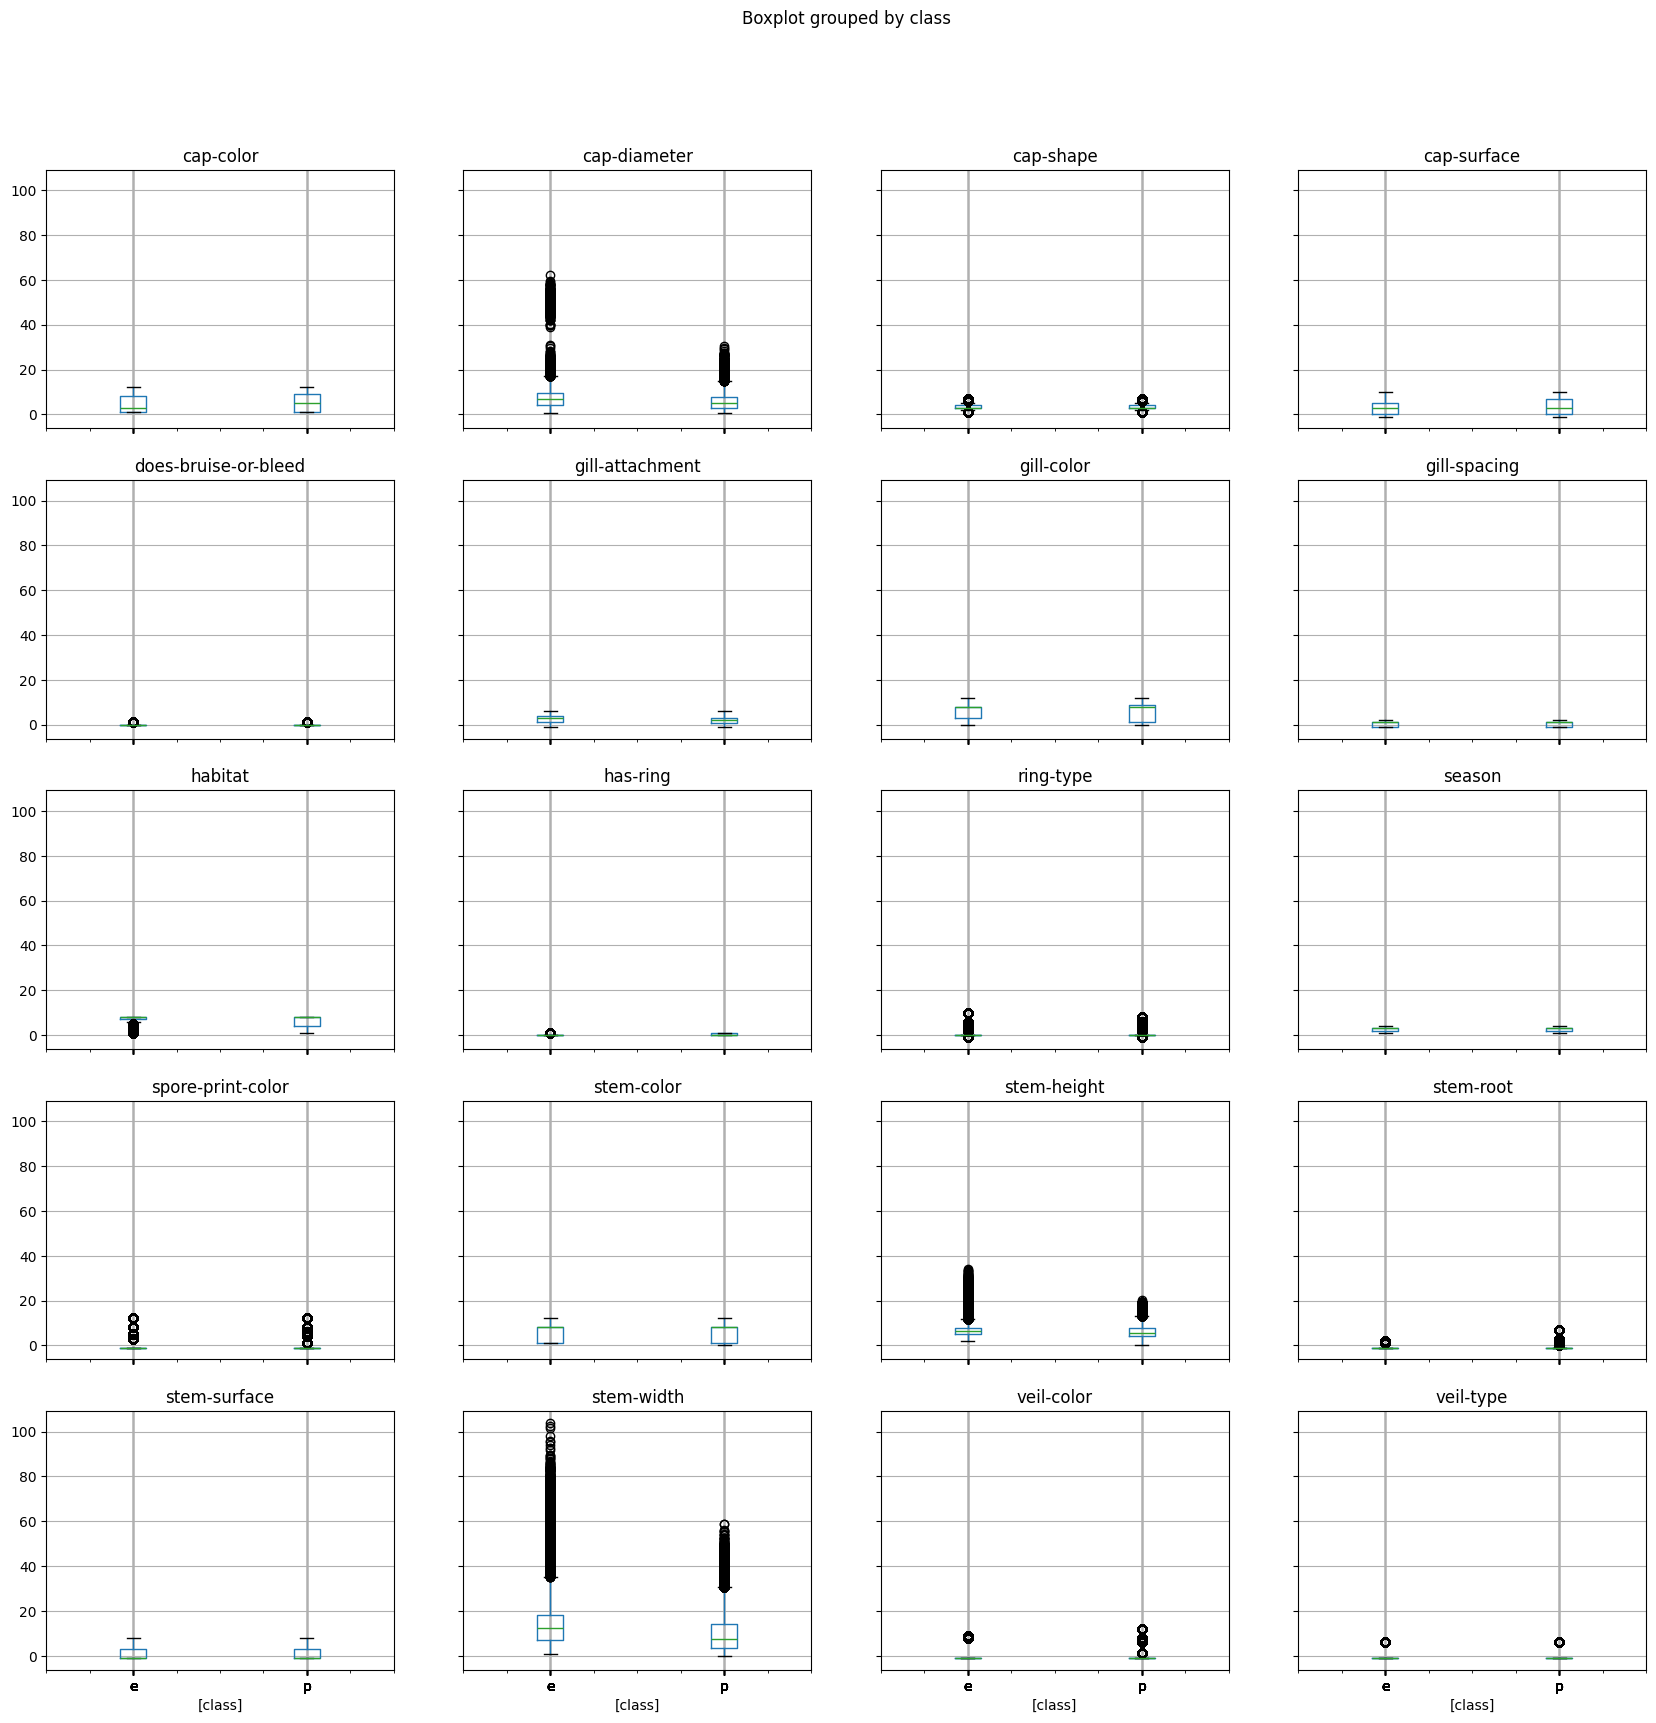

In [12]:
# check distribution
df.boxplot(by="class", figsize=(20, 20))
plt.show()

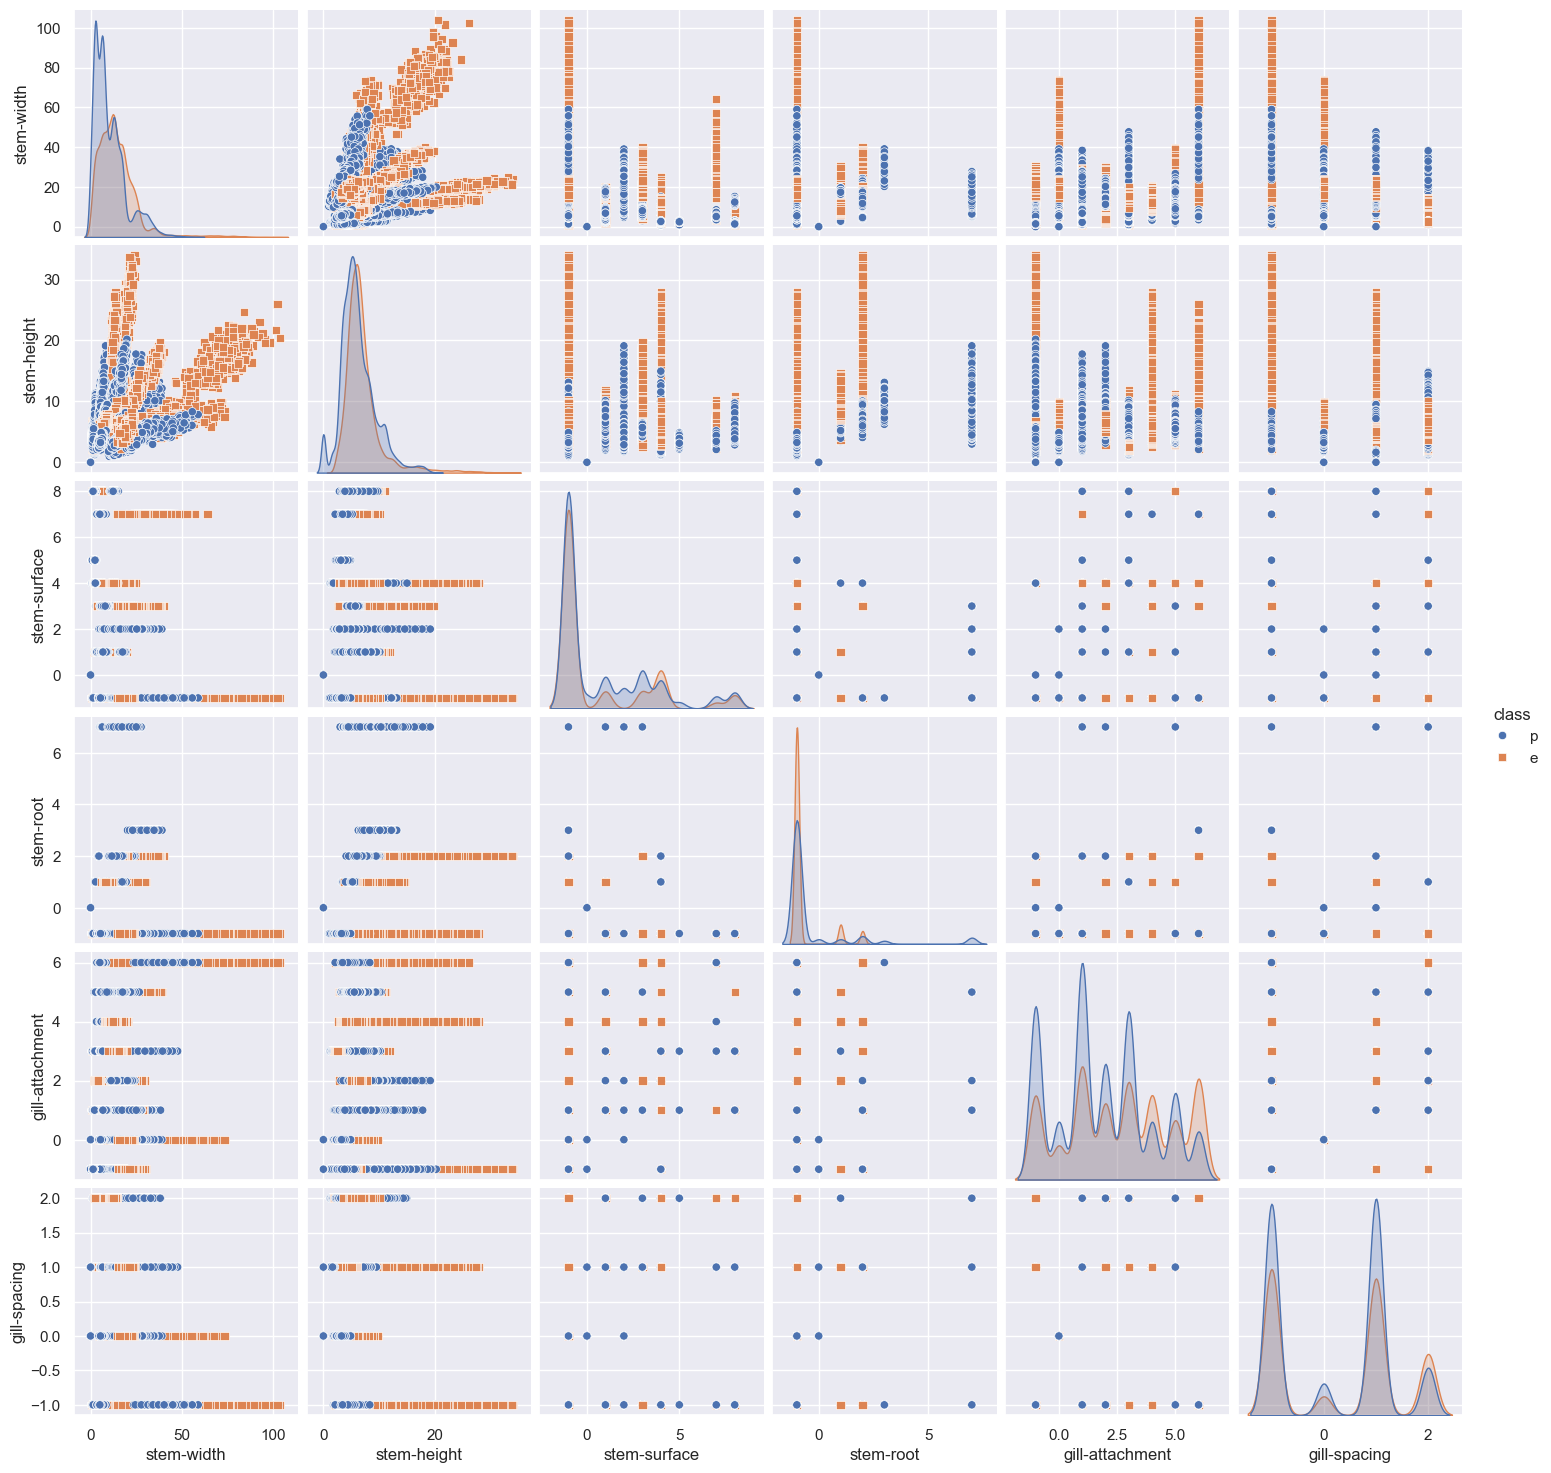

In [13]:
sns.set_theme(style='darkgrid')
g = sns.pairplot(df[['class', 'stem-width', 'stem-height', 'stem-surface', 'stem-root', 'gill-attachment', 'gill-spacing']], hue='class', markers=['o', 's'])

In [14]:
# prepare data for model building with scikit-learn

# X and y
X = df.drop(columns=['class'])

y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
print(nulls_per_column)
X.head(20)

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,3,2,11,0,4,-1,8,16.95,17.09,2,3,8,6,8,1,4,-1,8,4
1,16.60,3,2,11,0,4,-1,8,17.99,18.19,2,3,8,6,8,1,4,-1,8,2
2,14.07,3,2,11,0,4,-1,8,17.80,17.74,2,3,8,6,8,1,4,-1,8,4
3,14.17,4,5,7,0,4,-1,8,15.77,15.98,2,3,8,6,8,1,6,-1,8,4
4,14.64,3,5,11,0,4,-1,8,16.53,17.20,2,3,8,6,8,1,6,-1,8,4
5,15.34,3,2,11,0,4,-1,8,17.84,18.79,2,3,8,6,8,1,6,-1,8,2
6,14.85,4,5,11,0,4,-1,8,17.71,16.89,2,3,8,6,8,1,4,-1,8,4
7,14.86,3,5,7,0,4,-1,8,17.03,17.44,2,3,8,6,8,1,6,-1,8,2
8,12.85,4,2,11,0,4,-1,8,17.27,18.69,2,3,8,6,8,1,6,-1,8,3
9,13.55,4,2,7,0,4,-1,8,16.04,16.88,2,3,8,6,8,1,6,-1,8,4


In [15]:
# X shape
X.shape

(61069, 20)

In [22]:
# model generation
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [23]:
# predict
y_pred = clf.predict(X_test)

Evaluate model quality

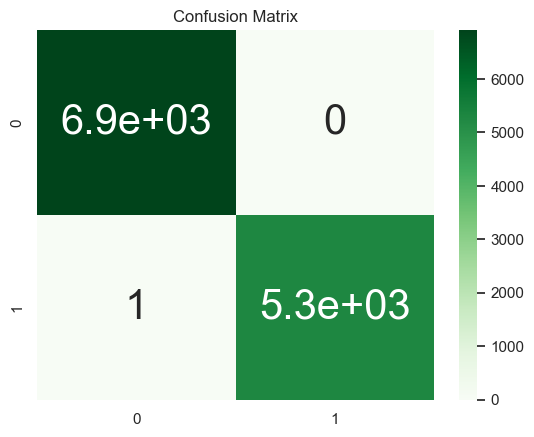

In [24]:
# generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

# visualize the confusion matrix
ax = plt.axes()
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, cmap="Greens", ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

In [26]:
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy of our model is equal {str(round(accuracy, 2))} %.')


Accuracy of our model is equal 99.99 %.


In [27]:
from sklearn.metrics import classification_report

edible = [x for x in df['class'] if "e" in x]
print("edible", len(edible))

poison = [x for x in df['class'] if "p" in x]
print("poison", len(poison))

# Classification report (as created by sklearn)
print('\n', classification_report(y_test, y_pred, target_names=['poisinuos', 'edible']))

nulls_per_column = X.isnull().sum()


edible 27181
poison 33888

               precision    recall  f1-score   support

   poisinuos       1.00      1.00      1.00      6912
      edible       1.00      1.00      1.00      5302

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



### How does the model decide?
(drawing decision boundaries)

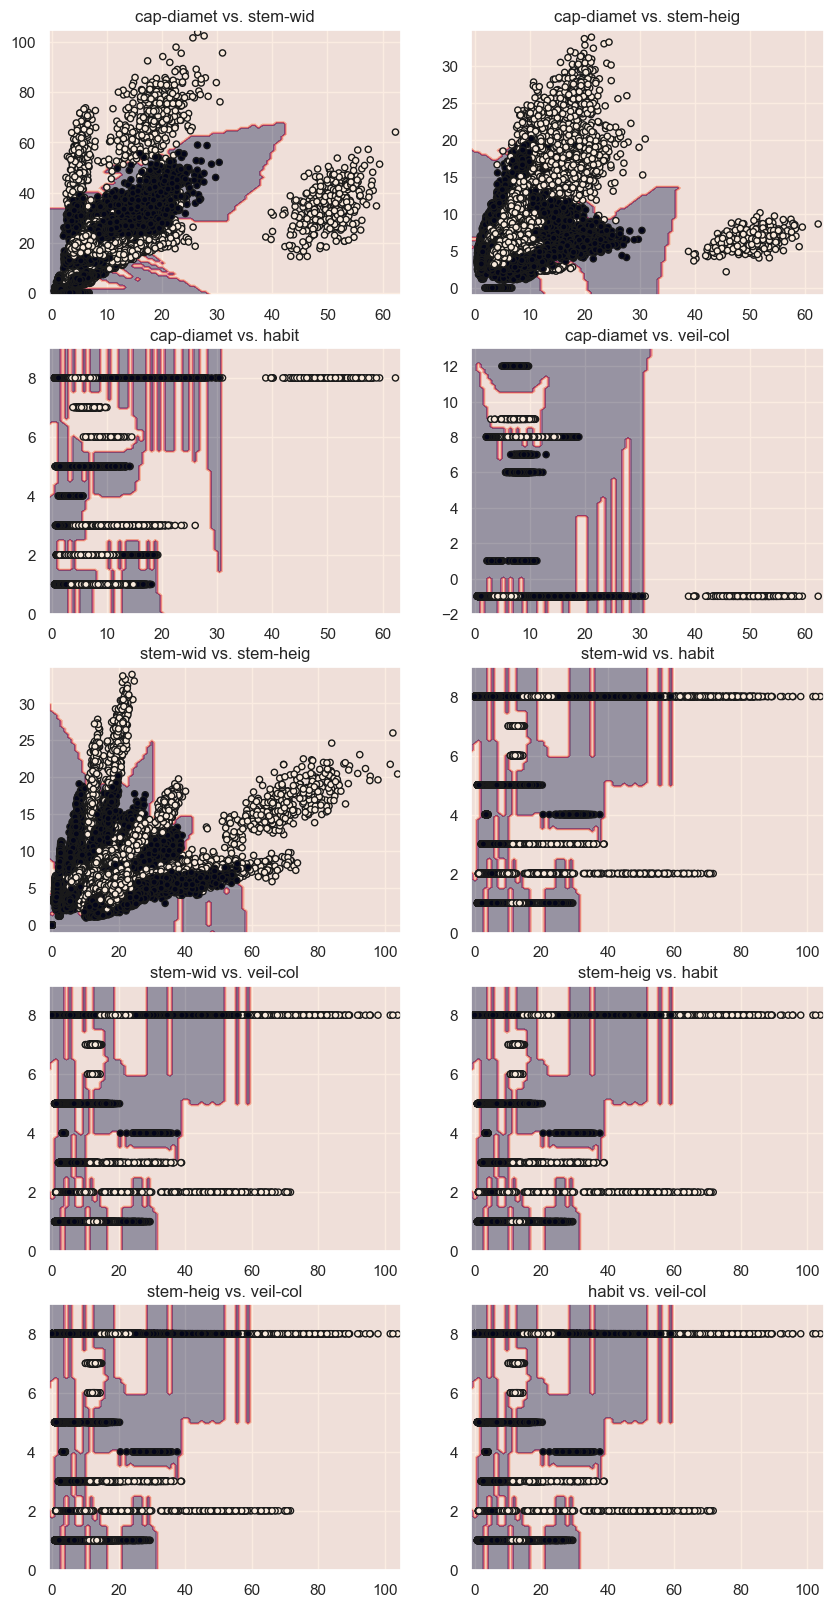

In [28]:
# only needed for display of decission boundaries
from itertools import product
from sklearn.inspection import DecisionBoundaryDisplay

# all combinations to compare
X_cols_combo = [["cap-diameter", "stem-width"], ["cap-diameter", "stem-height"], ["cap-diameter", "habitat"], ["cap-diameter", "veil-color"],
                ["stem-width", "stem-height"], ["stem-width", "habitat"], ["stem-width", "veil-color"], 
                ["stem-height", "habitat"], ["stem-height", "veil-color"], 
                ["habitat", "veil-color"]]

# comparing datasets
X1 = df[X_cols_combo[0]].to_numpy()
X2 = df[X_cols_combo[1]].to_numpy()
X3 = df[X_cols_combo[2]].to_numpy()
X4 = df[X_cols_combo[3]].to_numpy()
X5 = df[X_cols_combo[4]].to_numpy()
X6 = df[X_cols_combo[5]].to_numpy()
X7 = df[X_cols_combo[5]].to_numpy()
X8 = df[X_cols_combo[5]].to_numpy()
X9 = df[X_cols_combo[5]].to_numpy()
X10 = df[X_cols_combo[5]].to_numpy()
y = target

# generating a forrest of classifiers
clf_1 = KNeighborsClassifier(n_neighbors=2)
clf_2 = KNeighborsClassifier(n_neighbors=2)
clf_3 = KNeighborsClassifier(n_neighbors=2)
clf_4 = KNeighborsClassifier(n_neighbors=2)
clf_5 = KNeighborsClassifier(n_neighbors=2)
clf_6 = KNeighborsClassifier(n_neighbors=2)
clf_7 = KNeighborsClassifier(n_neighbors=2)
clf_8 = KNeighborsClassifier(n_neighbors=2)
clf_9 = KNeighborsClassifier(n_neighbors=2)
clf_10 = KNeighborsClassifier(n_neighbors=2)

# make things iterable
clf_all = [clf_1, clf_2, clf_3, clf_4, clf_5, clf_6, clf_7, clf_8, clf_9, clf_10]
X_sets = [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10]

# helper to generate the image position
img_pos = [pos_t for pos_t in product([0, 1, 2, 3, 4], [0, 1])]


f, ax = plt.subplots(5, 2, figsize=(10, 20))

for i, classifier in enumerate(clf_all):
    classifier.fit(X_sets[i], y)
    DecisionBoundaryDisplay.from_estimator(classifier, X_sets[i], alpha=0.4, ax=ax[img_pos[i][0], img_pos[i][1]], response_method="predict")
    ax[img_pos[i][0], img_pos[i][1]].scatter(X_sets[i][:, 0], X_sets[i][:, 1], c=y, s=20, edgecolor="k")
    ax[img_pos[i][0], img_pos[i][1]].set_title(f"{X_cols_combo[i][0][:-2]} vs. {X_cols_combo[i][1][:-2]}")

